<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#iris" data-toc-modified-id="iris-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>iris</a></span></li><li><span><a href="#glass" data-toc-modified-id="glass-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>glass</a></span></li><li><span><a href="#wine" data-toc-modified-id="wine-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>wine</a></span></li><li><span><a href="#hepatitis" data-toc-modified-id="hepatitis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>hepatitis</a></span></li><li><span><a href="#seismic-bumps" data-toc-modified-id="seismic-bumps-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>seismic-bumps</a></span></li><li><span><a href="#real-image-segmentation" data-toc-modified-id="real-image-segmentation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>real image segmentation</a></span></li></ul></div>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../utils/')
import imp
import plot_tools
imp.reload(plot_tools)
import pandas as pd
import networkx as nx
from sklearn.metrics import f1_score,adjusted_rand_score

def match(current,true_set):
        max_overlap=0
        idx=None
        for j in true_set.keys():
            N=len(current&true_set[j])
            if N>max_overlap:
                max_overlap=N
                idx=j
        return idx

def matchY(Y_pred,Y_true):
    pred_set={}
    for i in list(set(Y_pred)):
        pred_set[int(i)]=set(np.where(Y_pred==i)[0])

    true_set={}
    for i in sorted(list(set(Y_true))):
        true_set[int(i)]=set(np.where(Y_true==i)[0])

    sort_idx=np.argsort(-np.array(list(map(len,pred_set.values()))))
    
    Y_pred=np.zeros_like(Y_pred)-2
    for i in sort_idx:
        real_y=match(pred_set[i],true_set)
        if real_y is None:
            Y_pred[list(pred_set[i])]=-2
        else:
            Y_pred[list(pred_set[i])]=real_y
            del true_set[real_y]

    return Y_pred,Y_true

# iris

In [5]:
panda=pd.read_csv('./iris.csv', header=None)
X=panda.iloc[1:,:-1].values.astype(np.float)
Y_true=panda.iloc[1:,-1].values.astype(np.float)

[0.94141646 0.86148195 0.79602097 0.78093825 0.59439783 0.33250737
 0.35845626 0.9751185  0.27729164 0.97506431 0.42929851 0.68575129
 0.81631118 0.29190463 0.06010293 0.01636689 0.30123196 0.92820246
 0.16176928 0.55615853 0.5173194  0.51908762 0.10440711 0.350415
 0.51349744 0.70271848 0.75181071 0.87678823 0.89025193 0.79126798
 1.         0.46073479 0.07051703 0.07745721 0.97506431 0.57527404
 0.38232324 0.97506431 0.45997664 0.97165261 0.861033   0.
 0.41361967 0.299315   0.39486237 0.70928476 0.49800604 0.73081368
 0.53071439 0.68254276 0.17830717 0.22779621 0.33473743 0.16822547
 0.35687873 0.47967474 0.16978429 0.16168055 0.41731793 0.08368111
 0.00656869 0.43406977 0.02689307 0.58231229 0.31672565 0.41517331
 0.40767622 0.37631046 0.1321825  0.53069556 0.14501926 0.36811357
 0.1083838  0.34675212 0.48621688 0.46298097 0.18183081 0.29463755
 0.5357206  0.29451363 0.42162743 0.33963348 0.55728198 0.28501377
 0.23866646 0.06863712 0.46693433 0.10176431 0.51913243 0.40602287
 0.37

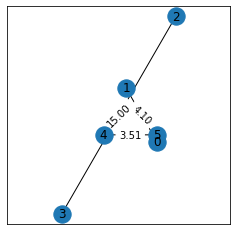

In [233]:
import api
imp.reload(api)

Y_pred = api.DGSFC.fit( X,
                      K_d=10,
                      K_n=10,
                      epsilon=0,
                      lamda=0.4,
                      plot=True,
                      pnum=30,
                      mp4=False,
                      fps=4,
                      figroot='/usr/data/gzy/DGC/results/circles',
                      mp4name='circles'
                     )
# print(Y_pred)
# print(Y_true.astype(np.int))
# print(np.sum(Y_pred==Y_true)/Y_true.shape[0])

# print( 'f1_score:{}'.format(f1_score(Y_true, Y_pred, average='weighted')) )
# print( 'adjusted_rand_score:{}'.format(adjusted_rand_score(Y_true, Y_pred)) )

# glass

In [21]:
panda=pd.read_csv('./glass.csv', header=None)
X=panda.iloc[1:,:-1].values.astype(np.float)
Y_true=panda.iloc[1:,-1].values.astype(np.int)
Y_set=list(set(Y_true))
Y_map={Y_set[i]:i for i in range(len(Y_set))}
Y_true=np.array([Y_map[y] for y in Y_true])

../utils/topo_graph.py:63: RuntimeWarning:

invalid value encountered in true_divide



[ 1  1  1  1  1  0  1  1  1  0  0  1  0  0  1  1  1  0  1  1  0  0  1  1
  1  1  1  1  1  1  0  1  0  1  1  1  1  1  0  0  1  1  1  0  0  1  0  0
  0  1  0  0  1  1  1  0  0  1  1  0  1  1  0  0  0  1  0  0  0  0  1  0
  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1  1  1  1  0  1  0  1  1  1
  0  0  1  1  0  1  0  0  0 -2 -2 -2  0  1 -2 -2 -2  0  1  1  1  1  0  1
  1  0  1  1  1  0  1  0  0  0  1  0  1  0  1  0  0  1  1  1  1  0  0  1
  0  0  1  1  0  1  0  0  1  1  1  1  1  0  1  1  1  0  0  5  1  1  1  1
  1  1  0  3 -2  1  0  0  1  1  1  1  1  1  1  1  5  1  1  1  1  5  1  5
  5  5  5  5  5  5  5  5  5  1  5  5  5  5  5  5  5  5  5  5  5  5]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3

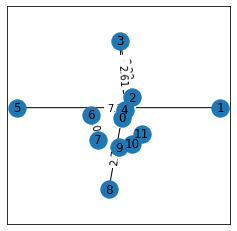

In [52]:
import api
imp.reload(api)

Y_pred=api.DGSFC.fit( X,
                      K_d=30,
                      K_n=10,
                      lamda=0.05,
                      epsilon=0,
                      plot=True,
                      pnum=30,
                      mp4=False,
                      fps=4,
                      figroot='/usr/data/gzy/DGC/results/circles',
                      mp4name='circles'
                     )

Y_pred,Y_true=matchY(Y_pred,Y_true)
print(Y_pred)
print(Y_true)
print(np.sum(Y_pred==Y_true)/Y_true.shape[0])

print( 'f1_score:{}'.format(f1_score(Y_true, Y_pred, average='weighted')) )
print( 'adjusted_rand_score:{}'.format(adjusted_rand_score(Y_true, Y_pred)) )

# wine

In [53]:
df=pd.read_csv('./wine.csv', header=None)
X=df.iloc[1:,:-1].values.astype(np.float)
Y_true=df.iloc[1:,-1].values.astype(np.int)
Y_set=list(set(Y_true))
Y_map={Y_set[i]:i for i in range(len(Y_set))}
Y_true=np.array([Y_map[y] for y in Y_true])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  1  2  2  0  1  2  0  1  1  2  0  2  0
  2  0  0  1  1  2  0 -2  1  1  2  2 -2  1  2  2  2  1  2  2  2  1  1  0
  2  1  1  1  1  1 -2  1  1  2  1  2  1 -2  0  1  2  2 -2  2  1  1  2  1
 -2 -2 -2  0 -2 -2 -2  2  2 -2  2  2  2  2  2  2  2  2 -2  2  2  2  2 -2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
0.7303370786516854
f1_score:0.7235591038214944
adjusted_rand_score:0.48409858326861815


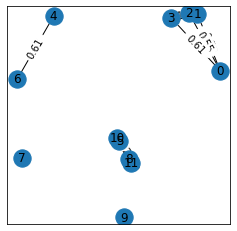

In [20]:
import api
imp.reload(api)

Y_pred=api.DGSFC.fit( X,
                      K_d=15,
                      K_n=5,
                      lamda=0.1,
                      epsilon=0,
                      plot=True,
                      pnum=30,
                      mp4=False,
                      fps=4,
                      figroot='/usr/data/gzy/DGC/results/circles',
                      mp4name='circles'
                     )

Y_pred,Y_true=matchY(Y_pred,Y_true)
print(Y_pred)
print(Y_true)
print(np.sum(Y_pred==Y_true)/Y_true.shape[0])

print( 'f1_score:{}'.format(f1_score(Y_true, Y_pred, average='weighted')) )
print( 'adjusted_rand_score:{}'.format(adjusted_rand_score(Y_true, Y_pred)) )

# hepatitis

In [91]:
df=pd.read_csv('./hepatitis.csv')
X=df.iloc[:,1:].values.astype(np.float)
Y_true=df.iloc[:,0].values.astype(np.int)
Y_set=list(set(Y_true))
Y_map={Y_set[i]:i for i in range(len(Y_set))}
Y_true=np.array([Y_map[y] for y in Y_true])

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0
  1  1  1  1  1  1  1  1  1 -2  1  1 -2  1  1  1  1  1  1  1  1 -2  1  1
 -2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -2  1  1
  1  1  1  1  1 -2  1  1 -2  1  1  1  1  1  1  1  1 -2  1  1  1  1]
[1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0]
0.8028169014084507
f1_score:0.7550075104801051
adjusted_rand_score:0.21629615588785034


../utils/topo_graph.py:63: RuntimeWarning:

invalid value encountered in true_divide



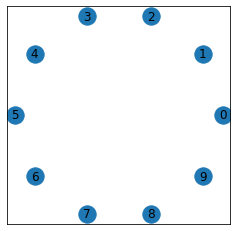

In [105]:
import api
imp.reload(api)

Y_pred=api.DGSFC.fit( X,
                      K_d=30,
                      K_n=22,
                      lamda=0.2,
                      epsilon=0,
                      plot=True,
                      pnum=30,
                      mp4=False,
                      fps=4,
                      figroot='/usr/data/gzy/DGC/results/circles',
                      mp4name='circles'
                     )

Y_pred,Y_true=matchY(Y_pred,Y_true)
print(Y_pred)
print(Y_true)
print(np.sum(Y_pred==Y_true)/Y_true.shape[0])

print( 'f1_score:{}'.format(f1_score(Y_true, Y_pred, average='weighted')) )
print( 'adjusted_rand_score:{}'.format(adjusted_rand_score(Y_true, Y_pred)) )

In [106]:
import hdbscan

In [120]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True,cluster_selection_epsilon=10)
clusterer.fit(X)
Y_pred=clusterer.labels_
print(Y_pred)

[-1 -1 -1 -1 -1 -1 -1  1 -1  0 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1  0 -1 -1
 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1
  1 -1  0 -1  1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1
 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1
 -1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1  0 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1]


# seismic-bumps

In [134]:
df = pd.read_csv('./seismic-bumps.txt',sep = ',',header=None)
for col in [0,1,2,7]:
    sym=list(set(df.iloc[:,col]))
    for i in range(len(sym)):
        df.iloc[df.iloc[:,col]==sym[i],col]=i

In [136]:
X=df.iloc[:,:-1].values.astype(np.float)
Y_true=df.iloc[:,-1].values.astype(np.int)
Y_set=list(set(Y_true))
Y_map={Y_set[i]:i for i in range(len(Y_set))}
Y_true=np.array([Y_map[y] for y in Y_true])

../utils/kde.py:9: RuntimeWarning:

divide by zero encountered in true_divide

../utils/kde.py:26: RuntimeWarning:

invalid value encountered in matmul

../utils/topo_graph.py:63: RuntimeWarning:

invalid value encountered in true_divide



[ 0 -2 -2 ... -2 -2 -2]
[0 0 0 ... 0 0 0]
0.0007739938080495357
f1_score:0.0015431408421893787
adjusted_rand_score:0.009403710725572337


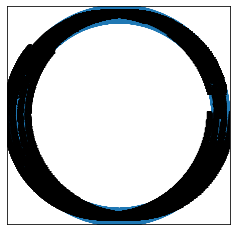

In [143]:
import api
imp.reload(api)

Y_pred=api.DGSFC.fit( X,
                      K_d=50,
                      K_n=50,
                      lamda=0.2,
                      epsilon=0,
                      plot=True,
                      pnum=30,
                      mp4=False,
                      fps=4,
                      figroot='/usr/data/gzy/DGC/results/circles',
                      mp4name='circles'
                     )

Y_pred,Y_true=matchY(Y_pred,Y_true)
print(Y_pred)
print(Y_true)
print(np.sum(Y_pred==Y_true)/Y_true.shape[0])

print( 'f1_score:{}'.format(f1_score(Y_true, Y_pred, average='weighted')) )
print( 'adjusted_rand_score:{}'.format(adjusted_rand_score(Y_true, Y_pred)) )

# real image segmentation

In [2]:
import matplotlib.image as imgplt
X = imgplt.imread('./westlake.jpg')
X = X.reshape(-1,3)

../utils/topo_graph.py:53: RuntimeWarning:

invalid value encountered in true_divide



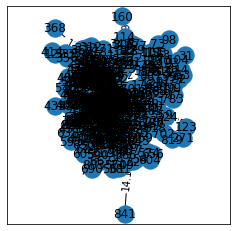

In [4]:
import api
imp.reload(api)

X_pred=api.DGSFC.fit( X,
                      K_d=10,
                      search_n=5,
                      ratio=0.1,
                      level=1,
                      plot=True,
                      pnum=30,
                      mp4=False,
                      fps=4,
                      figroot='/usr/data/gzy/DGC/results/circles',
                      mp4name='circles'
                     )